# * Supermarket Sales *
### Historical record of sales data in 3 different supermarkets

The purpose of this project is to investigate the relationship among supermarket sales' independent variables and the gross income (Dependent variable/Target) for three different supermarkets and answer the question: "How can we increase the gross income for these three supermarkets in our dataset using Multiple Linear Regression model?" The study is based on the data, collected from Kaggle. 
 https://www.kaggle.com/aungpyaeap/supermarket-sales

#### >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

### Step 1: Importing Libraries
To build the model, we need some tools to make the process as seamless as possible. Here is a few of them:
1. Pandas:     This will make grabbing and transferring the data easily.
2. Sklearn:    This library contains a lot of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction.
3. Scipy:      Is a library that uses NumPy for more mathematical functions. SciPy uses NumPy arrays as the basic data structure, and comes with modules for various commonly used tasks in scientific programming, including linear algebra, integration (calculus), ordinary differential equation solving, and signal processing.This library makes interpreting our outputs much easier.
4. Matplotlib: Visuals are keys to analysis and this library will help us build 
    those visuals.It is a plotting library for the Python programming language and its numerical mathematics extension NumPy. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits like Tkinter, wxPython, Qt, or GTK+. ... SciPy makes use of Matplotlib. 
5. Numpy:  Is a python library used for working with arrays. It also has functions for working in domain of linear algebra, fourier transform, and matrices.    

In [5]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import numpy as np
import warnings
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from pandas import datetime
%matplotlib inline
import seaborn as seabornInstance
from datetime import datetime
from datetime import datetime as dt
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


C:\Users\Soheila\Anaconda3\Anaconda\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  # This is added back by InteractiveShellApp.init_path()


### Step 2:  Reading CSV file from dataset to the dataframe
We want our data in a data frame as this will give it structure that can be easily leveraged. Using read_csv() method from Pandas to read CSV data to the data frame.

In [6]:
# Reading csv file (dataset) to the Dataframe  
df = pd.read_csv("supermarket_sales.csv", index_col ="branch" )
df.head()

,invoiceID,city,cust_type,gender,type,unit_price,quantity,date,time,payment,cost,rating,gross_income
branch,,,,,,,,,,,,,
A,101-17-6199,Cairo,Normal,Male,Food and beverages,45.79,7,3/13/2019,19:44,Credit card,320.53,7.0,16.0265
C,101-81-4070,Alexandria,Member,Female,Health and beauty,62.82,2,1/17/2019,12:36,eWallet,125.64,4.9,6.2820
C,102-06-2002,Alexandria,Member,Male,Sports and travel,25.25,5,3/20/2019,17:52,Cash,126.25,6.1,6.3125
C,102-77-2261,Alexandria,Member,Male,Health and beauty,65.31,7,3/5/2019,18:02,Credit card,457.17,4.2,22.8585
A,105-10-6182,Cairo,Member,Male,Fashion accessories,21.48,2,2/27/2019,12:22,eWallet,42.96,6.6,2.1480


Pandas dataframe.info() function is used to get a concise summary of the dataframe. It comes really handy when doing exploratory analysis of the data. 

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, A to A
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   invoiceID     1000 non-null   object 
 1   city          1000 non-null   object 
 2   cust_type     1000 non-null   object 
 3   gender        1000 non-null   object 
 4   type          1000 non-null   object 
 5   unit_price    1000 non-null   float64
 6   quantity      1000 non-null   int64  
 7   date          1000 non-null   object 
 8   time          1000 non-null   object 
 9   payment       1000 non-null   object 
 10  cost          1000 non-null   float64
 11  rating        1000 non-null   float64
 12  gross_income  1000 non-null   float64
dtypes: float64(4), int64(1), object(8)
memory usage: 109.4+ KB
None


### Step 3:  Cleaning Data
The chance of getting a perfectly cleaned dataset that meets all of our requirements is slim to none. So, we need to clean the data before we start modeling. Here is a checklist when it comes to cleaning the data:

  1. Check the data types to make sure they are correct.
  2. Make sure the column names are correct. This makes the process of selecting data easier.
  3. Check for missing values. This helps control for errors.

In [8]:
# check the data types
df.dtypes

invoiceID        object
city             object
cust_type        object
gender           object
type             object
unit_price      float64
quantity          int64
date             object
time             object
payment          object
cost            float64
rating          float64
gross_income    float64
dtype: object

#### 3.1. Missing Values:
Misssing data present various problems: 
* First, the absence of data reduces statistical power, which refers to the probability that the test will reject the null hypothesis when it is false.
* Second, the lost data can cause bias in the estimation of parameters. 
* Third, it can reduce the representativeness of the samples.
* Fourth, it may complicate the analysis of the study. 

Each of these distortions may threaten the validity of the trials and can lead to invalid conclusions.

In [9]:
# check for missing values
df.isnull().any()

invoiceID       False
city            False
cust_type       False
gender          False
type            False
unit_price      False
quantity        False
date            False
time            False
payment         False
cost            False
rating          False
gross_income    False
dtype: bool

Once the above code is executed, all the columns should give False, In case for any column we find True result, then we have to remove all the null values from that column using dropna() method.When it comes to the missing values there's lot of debates of how you can handle them and it depends on the problem. We can populate it with something or drop those rows. The above result shows we didn't have any missing values in our data set.

#### 3.2. Outliers:
In statistics, an outlier is an observation point that is distant from other observations. Features/independent variable will be used to look for any outlier. The boxplot method was applied to find the outliers for unit price, quantity, and cost. These three were checked because they were the actual numbers that were to be used in the algorithm with using the correlation features results in the correlation section of this project.   

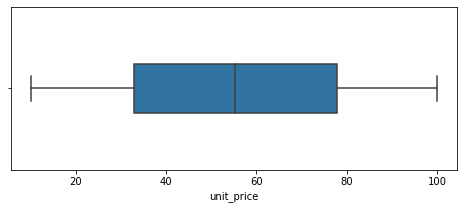

In [10]:
plt.figure(figsize=(8,3))
sns.boxplot(x=df['unit_price'], width=0.3)

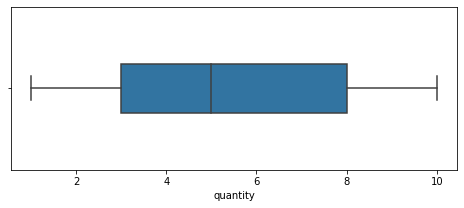

In [11]:
plt.figure(figsize=(8,3))
sns.boxplot(x=df['quantity'], width=0.3)

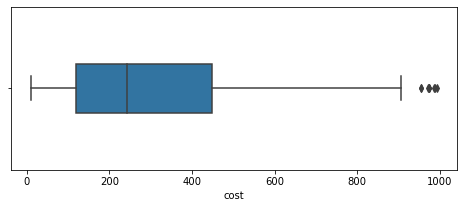

In [12]:
plt.figure(figsize=(8,3))
sns.boxplot(x=df['cost'], width=0.3)

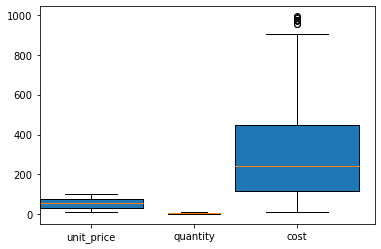

In [13]:
import matplotlib.pyplot as plt
 
value1 = df['unit_price']
value2 = df['quantity']
value3 = df['cost']
 
box_plot_data=[value1,value2,value3]
plt.boxplot(box_plot_data,patch_artist=True,labels=['unit_price','quantity','cost'], widths=(1, 0.5, 1.2))

#plt.boxplot(data, labels=labels, showfliers=False, widths=(1, 0.5, 1.2, 0.1))
plt.show()

The result showed that unit price and quantity did not have any outliers, and cost had four. Although the feature cost had four outliers, since the study’s purpose is to find the important factors that impact the gross income, it was decided that it would be best to not eliminate the outliers within the dataset.

### Step 4: Exploring Data
This is very important step as it helps us understand some of the following questions:
1. How is the data distributed?
2. Are there any outliers?
3. Is there any relationship between variables?
4. Is data skewed?

By better understanding the answers to these questions we can validate whether we need to do further transformations or if we need to change the model that we picked.

#### 4.1. Scatter Plot:
Scatter plot helps us to visualize the relationship between our data.

For our modeling, all categories within the data would not be used. The attributes that could best explain the relationship of an independent variable with the target variable were chosen. There were certain features which were more important than other features to the accuracy of the model. From all features, “city”, “type”, “unit price”, “quantity”, “time”, and “date” would be selected as the input features, and “gross income” were selected as the output. 

* Scatter Plot for "cost" and "gross income"

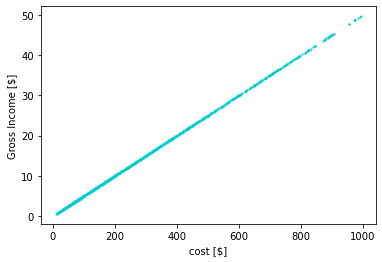

In [14]:
# Predicting "Gross Income" according to "Cost"
plt.xlabel('cost [$]')
plt.ylabel('Gross Income [$]')
plt.scatter(df.cost, df.gross_income,5, color= 'darkturquoise', marker = '.')

* Scatter Plot for "unit price" and "gross income"

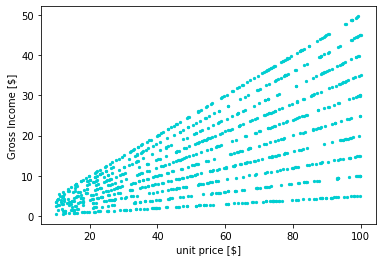

In [15]:
# Predicting "Gross Income" according to "unit price"
plt.xlabel('unit price [$]')
plt.ylabel('Gross Income [$]')
plt.scatter(df.unit_price, df.gross_income,20, color= 'darkturquoise', marker = '.')

* Scatter Plot for ""quantity" and "gross income"

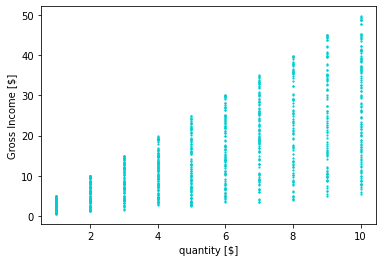

In [16]:
# Predicting "Gross Income" according to "quantity"
sizevalues = 6
plt.xlabel('quantity [$]')
plt.ylabel('Gross Income [$]')
plt.scatter(df.quantity, df.gross_income, s=sizevalues, color= 'darkturquoise', marker = '.')

The result shows there is a positive correlations between Gross Income and City, Unit price and quantity. These graphs direct us the sense of what kind of questions we should answer and help us to answer the question of is there any transformations that we need to do, especially when it comes to outliers.The scatter plot is showing that the relationships between these three variables and the gross income is linear. It means by increasing their amount, the gross income will also increase.   

To compare the distribution of cost, unit price, and quantity in all three branches we need to group data from data frame by branchs, using df.groupby() method from Pandas. We will use these new data frames (df_superA, df_supeB, df_superC) to visualize the distribution of cost, unit price, and quantity in each of the supermarkets.

In [17]:
# retrieving row by loc method for three supermarkets A, B, and C
superA = df.loc["A"] 
superB = df.loc["B"] 
superC = df.loc["C"] 
  
print(superA, "\n\n\n", superB, "\n\n\n", superC, "\n\n\n")

# making data frame for super markets A, B, C
df_superA = pd.DataFrame(superA, columns = ['invoiceID', 'branch', 'city','cust_type', 'gender', 'type', 'unit_price', 'quantity', 'date', 'time', 'payment', 'cost', 'gross income', 'rating'])
df_superB = pd.DataFrame(superB, columns = ['invoiceID', 'branch', 'city','cust_type', 'gender', 'type', 'unit_price', 'quantity', 'date', 'time', 'payment', 'cost', 'gross income', 'rating'])
df_superC = pd.DataFrame(superC, columns = ['invoiceID', 'branch', 'city','cust_type', 'gender', 'type', 'unit_price', 'quantity', 'date', 'time', 'payment', 'cost', 'gross income', 'rating'])  

          invoiceID   city cust_type  gender                    type  \
branch                                                                 
A       101-17-6199  Cairo    Normal    Male      Food and beverages   
A       105-10-6182  Cairo    Member    Male     Fashion accessories   
A       105-31-1824  Cairo    Member    Male       Sports and travel   
A       106-35-6779  Cairo    Member    Male      Home and lifestyle   
A       123-19-1176  Cairo    Member    Male       Health and beauty   
...             ...    ...       ...     ...                     ...   
A       886-54-6089  Cairo    Normal  Female      Home and lifestyle   
A       888-02-0338  Cairo    Normal    Male  Electronic accessories   
A       892-05-6689  Cairo    Normal  Female      Home and lifestyle   
A       896-34-0956  Cairo    Normal    Male     Fashion accessories   
A       898-04-2717  Cairo    Normal    Male     Fashion accessories   

        unit_price  quantity       date   time      payment    

In [18]:
# calling describe method for all three branches 

print("<<  Branch A Description  >> \n\n", df_superA.describe(), "\n\n")
print("<<  Branch B Description  >> \n\n", df_superB.describe(), "\n\n")
print("<<  Branch C Description  >> \n\n", df_superC.describe(), "\n\n")

<<  Branch A Description  >> 

        branch  unit_price    quantity        cost  gross income      rating
count     0.0  340.000000  340.000000  340.000000           0.0  340.000000
mean      NaN   54.780853    5.467647  297.480029           NaN    7.027059
std       NaN   26.132127    2.859876  220.609547           NaN    1.731345
min       NaN   10.080000    1.000000   12.090000           NaN    4.000000
25%       NaN   32.250000    3.000000  130.942500           NaN    5.600000
50%       NaN   53.235000    5.000000  229.360000           NaN    7.100000
75%       NaN   75.095000    8.000000  437.467500           NaN    8.500000
max       NaN   99.830000   10.000000  989.800000           NaN   10.000000 


<<  Branch B Description  >> 

        branch  unit_price    quantity        cost  gross income      rating
count     0.0  332.000000  332.000000  332.000000           0.0  332.000000
mean      NaN   55.659277    5.481928  304.640482           NaN    6.818072
std       NaN   26.22

In [19]:
byBranch = df.groupby("branch").gross_income.value_counts(normalize=True)
print(byBranch)

branch  gross_income
A       10.3260         0.005882
        0.6045          0.002941
        0.7670          0.002941
        0.7750          0.002941
        0.9140          0.002941
                          ...   
C       47.7900         0.003049
        48.6050         0.003049
        48.7500         0.003049
        49.2600         0.003049
        49.6500         0.003049
Name: gross_income, Length: 997, dtype: float64


In [20]:
byBranch.unstack()

gross_income,0.5085,0.6045,0.6270,0.6390,0.6990,0.7670,0.7715,0.7750,0.8140,0.8875,...,45.3250,47.7200,47.7900,48.6050,48.6850,48.6900,48.7500,49.2600,49.4900,49.6500
branch,,,,,,,,,,,,,,,,,,,,,
A,NaN,0.002941,NaN,NaN,NaN,0.002941,NaN,0.002941,NaN,NaN,...,0.002941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002941,NaN
B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003012,...,NaN,NaN,NaN,NaN,0.003012,0.003012,NaN,NaN,NaN,NaN
C,0.003049,NaN,0.003049,0.003049,0.003049,NaN,0.003049,NaN,0.003049,NaN,...,NaN,0.003049,0.003049,0.003049,NaN,NaN,0.003049,0.003049,NaN,0.003049


#### 4.2. Distribution Plot:
* Comparing "cost", "unit price", "quantity" Distribution for Different Supermarkets.

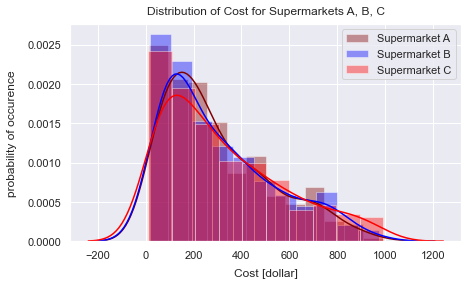

In [21]:
# Visualize the distribution of Cost in each Supermarket

#  Supermarket A
sns.set(rc={'figure.figsize':(12, 7.5)})
sns.set_context('talk')
sns.set(rc={'figure.figsize':(7, 4)})

sns.distplot(df_superA['cost'], color="maroon", label = 'Supermarket A')
plt.xlabel("Cost [dollar]", labelpad=8)
plt.ylabel("probability of occurence", labelpad=10)

#  Supermarket B
sns.set(rc={'figure.figsize':(12, 7.5)})
sns.set_context('talk')
sns.set(rc={'figure.figsize':(7, 4)})

sns.distplot(df_superB['cost'], color="blue", label = 'Supermarket B')
plt.xlabel("Cost [dollar]", labelpad=8)
plt.ylabel("probability of occurence", labelpad=10)

#  Supermarket C
sns.set(rc={'figure.figsize':(12, 7.5)})
sns.set_context('talk')
sns.set(rc={'figure.figsize':(7, 4)})

sns.distplot(df_superC['cost'], color="red", label = 'Supermarket C')
plt.xlabel("Cost [dollar]", labelpad=8)
plt.ylabel("probability of occurence", labelpad=10)

plt.title("Distribution of Cost for Supermarkets A, B, C", y=1.015, fontsize= 12);
plt.legend()


The three probability distributions depicted above are positively-skewed (or right-skewed) to an increasing degree.By the above Skewness we can judge that the likelihood of the amount of cost falling in the tail(cost>$100)of a probability distribution is more and in this case the mean of data is greater than the median.   

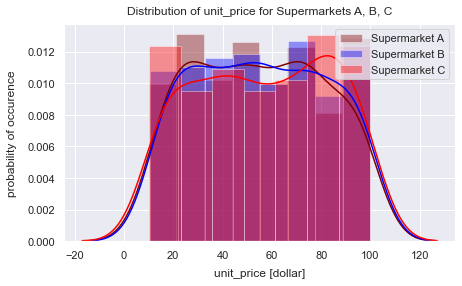

In [22]:
# Visualize the distribution of unit_price in each Supermarket

#  Supermarket A
sns.set(rc={'figure.figsize':(12, 7.5)})
sns.set_context('talk')
sns.set(rc={'figure.figsize':(7, 4)})

sns.distplot(df_superA['unit_price'], color="maroon", label = 'Supermarket A')
plt.xlabel("unit_price [dollar]", labelpad=8)
plt.ylabel("probability of occurence", labelpad=10)

#  Supermarket B
sns.set(rc={'figure.figsize':(12, 7.5)})
sns.set_context('talk')
sns.set(rc={'figure.figsize':(7, 4)})

sns.distplot(df_superB['unit_price'], color="blue", label = 'Supermarket B')
plt.xlabel("unit_price [dollar]", labelpad=8)
plt.ylabel("probability of occurence", labelpad=10)

#  Supermarket C
sns.set(rc={'figure.figsize':(12, 7.5)})
sns.set_context('talk')
sns.set(rc={'figure.figsize':(7, 4)})

sns.distplot(df_superC['unit_price'], color="red", label = 'Supermarket C')
plt.xlabel("unit_price [dollar]", labelpad= 8)
plt.ylabel("probability of occurence", labelpad=10)

plt.title("Distribution of unit_price for Supermarkets A, B, C", y=1.015, fontsize= 12);
plt.legend()

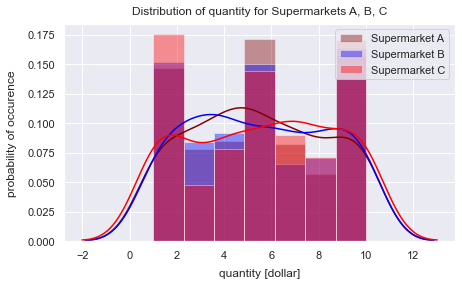

In [23]:
# Visualize the distribution of quantity in each Supermarket

#  Supermarket A
sns.set(rc={'figure.figsize':(12, 7.5)})
sns.set_context('talk')
sns.set(rc={'figure.figsize':(7, 4)})

sns.distplot(df_superA['quantity'], color="maroon", label = 'Supermarket A')
plt.xlabel("quantity [dollar]", labelpad=8)
plt.ylabel("probability of occurence", labelpad=10)

#  Supermarket B
sns.set(rc={'figure.figsize':(12, 7.5)})
sns.set_context('talk')
sns.set(rc={'figure.figsize':(7, 4)})

sns.distplot(df_superB['quantity'], color="blue", label = 'Supermarket B')
plt.xlabel("quantity [dollar]", labelpad=8)
plt.ylabel("probability of occurence", labelpad=10)

#  Supermarket C
sns.set(rc={'figure.figsize':(12, 7.5)})
sns.set_context('talk')
sns.set(rc={'figure.figsize':(7, 4)})

sns.distplot(df_superC['quantity'], color="red", label = 'Supermarket C')
plt.xlabel("quantity [dollar]", labelpad=8)
plt.ylabel("probability of occurence", labelpad=10)

plt.title("Distribution of quantity for Supermarkets A, B, C", y=1.015, fontsize= 12);
plt.legend()

### Step 5:  Converting Categorical Variables to Numerical
In order to apply the features within the dataset into the algorithm, all variables need to be numerical. A dummy variable is a numeric variable that represents categorical data. Since my dataset contained both categorical and numerical variables, the steps of converting categorical variables into numerical was needed. I used pd.get_dummies() from Pandas to convert the  categorical variables city, type and time. pd.get_dummies() method creates a new dataframe which consists of zeros and ones. 

* Converting "day" to Parts-of-week Features using dummy variable

In [24]:
df_time = pd.read_csv("supermarket_sales.csv" )
df_time.head()

,invoiceID,branch,city,cust_type,gender,type,unit_price,quantity,date,time,payment,cost,rating,gross_income
0,101-17-6199,A,Cairo,Normal,Male,Food and beverages,45.79,7,3/13/2019,19:44,Credit card,320.53,7.0,16.0265
1,101-81-4070,C,Alexandria,Member,Female,Health and beauty,62.82,2,1/17/2019,12:36,eWallet,125.64,4.9,6.2820
2,102-06-2002,C,Alexandria,Member,Male,Sports and travel,25.25,5,3/20/2019,17:52,Cash,126.25,6.1,6.3125
3,102-77-2261,C,Alexandria,Member,Male,Health and beauty,65.31,7,3/5/2019,18:02,Credit card,457.17,4.2,22.8585
4,105-10-6182,A,Cairo,Member,Male,Fashion accessories,21.48,2,2/27/2019,12:22,eWallet,42.96,6.6,2.1480


When a csv file is imported and a dataframe is made, the datetime objects in the file are read as a string object rather a datetime object and hence it’s very tough to perform operations like Time difference on a string rather a datetime object. Pandas to_datetime() method helps to convert string datetime into Python datetime object.

In [25]:
dateNew = pd.to_datetime(df_time['date'])
print(dateNew)

0     2019-03-13
1     2019-01-17
2     2019-03-20
3     2019-03-05
4     2019-02-27
         ...    
995   2019-01-19
996   2019-02-16
997   2019-03-05
998   2019-01-26
999   2019-03-19
Name: date, Length: 1000, dtype: datetime64[ns]


In [26]:
df_time['day'] = dateNew.dt.day
df_time.head()

,invoiceID,branch,city,cust_type,gender,type,unit_price,quantity,date,time,payment,cost,rating,gross_income,day
0,101-17-6199,A,Cairo,Normal,Male,Food and beverages,45.79,7,3/13/2019,19:44,Credit card,320.53,7.0,16.0265,13
1,101-81-4070,C,Alexandria,Member,Female,Health and beauty,62.82,2,1/17/2019,12:36,eWallet,125.64,4.9,6.2820,17
2,102-06-2002,C,Alexandria,Member,Male,Sports and travel,25.25,5,3/20/2019,17:52,Cash,126.25,6.1,6.3125,20
3,102-77-2261,C,Alexandria,Member,Male,Health and beauty,65.31,7,3/5/2019,18:02,Credit card,457.17,4.2,22.8585,5
4,105-10-6182,A,Cairo,Member,Male,Fashion accessories,21.48,2,2/27/2019,12:22,eWallet,42.96,6.6,2.1480,27


In [27]:
df_time['day_Name'] = dateNew.dt.day_name()
df_time.head()

,invoiceID,branch,city,cust_type,gender,type,unit_price,quantity,date,time,payment,cost,rating,gross_income,day,day_Name
0,101-17-6199,A,Cairo,Normal,Male,Food and beverages,45.79,7,3/13/2019,19:44,Credit card,320.53,7.0,16.0265,13,Wednesday
1,101-81-4070,C,Alexandria,Member,Female,Health and beauty,62.82,2,1/17/2019,12:36,eWallet,125.64,4.9,6.2820,17,Thursday
2,102-06-2002,C,Alexandria,Member,Male,Sports and travel,25.25,5,3/20/2019,17:52,Cash,126.25,6.1,6.3125,20,Wednesday
3,102-77-2261,C,Alexandria,Member,Male,Health and beauty,65.31,7,3/5/2019,18:02,Credit card,457.17,4.2,22.8585,5,Tuesday
4,105-10-6182,A,Cairo,Member,Male,Fashion accessories,21.48,2,2/27/2019,12:22,eWallet,42.96,6.6,2.1480,27,Wednesday


Changing Time variable to the different parts of day, Weekdays and Weekends to find out in which days of the week we have more gross income.

In [28]:
dvar1 = 'weekend'
dvar2 = 'weekday'

for i in range(len(df_time.index)):
    if df_time.loc[i, 'day_Name'] == 'Saturday' or df_time.loc[i, 'day_Name'] == 'Sunday': 
         df_time.loc[i, 'day_Name1'] = dvar1
    else:
         df_time.loc[i, 'day_Name1'] = dvar2
        
df_time.head()

,invoiceID,branch,city,cust_type,gender,type,unit_price,quantity,date,time,payment,cost,rating,gross_income,day,day_Name,day_Name1
0,101-17-6199,A,Cairo,Normal,Male,Food and beverages,45.79,7,3/13/2019,19:44,Credit card,320.53,7.0,16.0265,13,Wednesday,weekday
1,101-81-4070,C,Alexandria,Member,Female,Health and beauty,62.82,2,1/17/2019,12:36,eWallet,125.64,4.9,6.2820,17,Thursday,weekday
2,102-06-2002,C,Alexandria,Member,Male,Sports and travel,25.25,5,3/20/2019,17:52,Cash,126.25,6.1,6.3125,20,Wednesday,weekday
3,102-77-2261,C,Alexandria,Member,Male,Health and beauty,65.31,7,3/5/2019,18:02,Credit card,457.17,4.2,22.8585,5,Tuesday,weekday
4,105-10-6182,A,Cairo,Member,Male,Fashion accessories,21.48,2,2/27/2019,12:22,eWallet,42.96,6.6,2.1480,27,Wednesday,weekday


In [29]:
df['day'] = df_time['day'].values

In [30]:
df['day_Name'] = df_time['day_Name1'].values

In [31]:
df.head()

,invoiceID,city,cust_type,gender,type,unit_price,quantity,date,time,payment,cost,rating,gross_income,day,day_Name
branch,,,,,,,,,,,,,,,
A,101-17-6199,Cairo,Normal,Male,Food and beverages,45.79,7,3/13/2019,19:44,Credit card,320.53,7.0,16.0265,13,weekday
C,101-81-4070,Alexandria,Member,Female,Health and beauty,62.82,2,1/17/2019,12:36,eWallet,125.64,4.9,6.2820,17,weekday
C,102-06-2002,Alexandria,Member,Male,Sports and travel,25.25,5,3/20/2019,17:52,Cash,126.25,6.1,6.3125,20,weekday
C,102-77-2261,Alexandria,Member,Male,Health and beauty,65.31,7,3/5/2019,18:02,Credit card,457.17,4.2,22.8585,5,weekday
A,105-10-6182,Cairo,Member,Male,Fashion accessories,21.48,2,2/27/2019,12:22,eWallet,42.96,6.6,2.1480,27,weekday


* Converting "hour" to Parts-of-day Features using dummy variable

In [32]:
timeNew = pd.to_datetime(df_time['time'])
print(timeNew)

0     2020-09-22 19:44:00
1     2020-09-22 12:36:00
2     2020-09-22 17:52:00
3     2020-09-22 18:02:00
4     2020-09-22 12:22:00
              ...        
995   2020-09-22 19:39:00
996   2020-09-22 10:52:00
997   2020-09-22 19:46:00
998   2020-09-22 12:43:00
999   2020-09-22 15:49:00
Name: time, Length: 1000, dtype: datetime64[ns]


In [33]:
df_time = pd.DataFrame({'hour': timeNew.dt.hour})
df_time

,hour
0,19
1,12
2,17
3,18
4,12
...,...
995,19
996,10
997,19
998,12


In [34]:
for i in range(len(df_time.index)):
    if timeNew.dt.minute[i] > 30 and timeNew.dt.minute[i] < 60:
        df_time.loc[i, 'hour'] +=1
df_time.head(10)

,hour
0,20
1,13
2,18
3,18
4,12
5,15
6,11
7,15
8,12
9,20


Changing Time variable to the different parts of day, Morning, Afternoon, Evening and Night to find out in which part of the day we have more gross income.

In [35]:
var1 = 'morning'
var2 = 'afternoon'
var3 = 'evening'
var4 = 'night'

for i in range(len(df_time.index)):
    if df_time.loc[i, 'hour'] >= 10 and df_time.loc[i, 'hour'] <= 12:
         df_time.loc[i, 'time_of_day'] = var1
    else:
        if df_time.loc[i, 'hour'] > 12 and df_time.loc[i, 'hour'] <= 15:
            df_time.loc[i, 'time_of_day'] = var2
        else:
            if df_time.loc[i, 'hour'] > 15 and df_time.loc[i, 'hour'] <= 18:
                df_time.loc[i, 'time_of_day'] = var3
            else:
                if df_time.loc[i, 'hour'] > 18 and df_time.loc[i, 'hour'] <= 21:
                    df_time.loc[i, 'time_of_day'] = var4
        
df_time.head(10)

,hour,time_of_day
0,20,night
1,13,afternoon
2,18,evening
3,18,evening
4,12,morning
5,15,afternoon
6,11,morning
7,15,afternoon
8,12,morning
9,20,night


In [36]:
df['hour'] = df_time['hour'].values

In [37]:
df['time_of_day'] = df_time['time_of_day'].values

In [38]:
df = df[['invoiceID','city','cust_type','gender','type','unit_price','quantity','date','time','payment','cost','rating','day','day_Name','hour','time_of_day','gross_income']]
df.head()

,invoiceID,city,cust_type,gender,type,unit_price,quantity,date,time,payment,cost,rating,day,day_Name,hour,time_of_day,gross_income
branch,,,,,,,,,,,,,,,,,
A,101-17-6199,Cairo,Normal,Male,Food and beverages,45.79,7,3/13/2019,19:44,Credit card,320.53,7.0,13,weekday,20,night,16.0265
C,101-81-4070,Alexandria,Member,Female,Health and beauty,62.82,2,1/17/2019,12:36,eWallet,125.64,4.9,17,weekday,13,afternoon,6.2820
C,102-06-2002,Alexandria,Member,Male,Sports and travel,25.25,5,3/20/2019,17:52,Cash,126.25,6.1,20,weekday,18,evening,6.3125
C,102-77-2261,Alexandria,Member,Male,Health and beauty,65.31,7,3/5/2019,18:02,Credit card,457.17,4.2,5,weekday,18,evening,22.8585
A,105-10-6182,Cairo,Member,Male,Fashion accessories,21.48,2,2/27/2019,12:22,eWallet,42.96,6.6,27,weekday,12,morning,2.1480


In [39]:
# get the maximum values of all the column in dataframe
df['hour'].max()

21

In [40]:
df['hour'].min()

10

* Creating Dummy Variable for Categorical Variable, "city".

In [41]:
# Creating Dummy Variable for Categorical Variable, "city" 
df_cityDummies = pd.get_dummies(df.city)
df_cityDummies

,Alexandria,Cairo,Ismailia
branch,,,
A,0,1,0
C,1,0,0
C,1,0,0
C,1,0,0
A,0,1,0
...,...,...,...
C,1,0,0
B,0,0,1
B,0,0,1


Since we’ve created a whole new dataframe, in order to compare it to our original dataframe, we’re going to need to either merge or concatenate them to work with them properly. In creating dummy variables, we essentially created new columns for our original dataset. The old and new dataset don’t have any columns in common, so it would make most sense to concatenate them.
I chose to put the dummy variable on the right side of the dataframe by using pd.concat (the concatenation function).

In [42]:
df_Result = pd.concat([df, df_cityDummies], axis =1)
df_Result.head()

,invoiceID,city,cust_type,gender,type,unit_price,quantity,date,time,payment,cost,rating,day,day_Name,hour,time_of_day,gross_income,Alexandria,Cairo,Ismailia
branch,,,,,,,,,,,,,,,,,,,,
A,101-17-6199,Cairo,Normal,Male,Food and beverages,45.79,7,3/13/2019,19:44,Credit card,320.53,7.0,13,weekday,20,night,16.0265,0,1,0
C,101-81-4070,Alexandria,Member,Female,Health and beauty,62.82,2,1/17/2019,12:36,eWallet,125.64,4.9,17,weekday,13,afternoon,6.2820,1,0,0
C,102-06-2002,Alexandria,Member,Male,Sports and travel,25.25,5,3/20/2019,17:52,Cash,126.25,6.1,20,weekday,18,evening,6.3125,1,0,0
C,102-77-2261,Alexandria,Member,Male,Health and beauty,65.31,7,3/5/2019,18:02,Credit card,457.17,4.2,5,weekday,18,evening,22.8585,1,0,0
A,105-10-6182,Cairo,Member,Male,Fashion accessories,21.48,2,2/27/2019,12:22,eWallet,42.96,6.6,27,weekday,12,morning,2.1480,0,1,0


In [43]:
# Merging the Generated Dummy Variable for "city" to the Dataframe df
df_Merge1 = pd.concat([df, df_cityDummies], axis =1)
df_Merge1.head()

,invoiceID,city,cust_type,gender,type,unit_price,quantity,date,time,payment,cost,rating,day,day_Name,hour,time_of_day,gross_income,Alexandria,Cairo,Ismailia
branch,,,,,,,,,,,,,,,,,,,,
A,101-17-6199,Cairo,Normal,Male,Food and beverages,45.79,7,3/13/2019,19:44,Credit card,320.53,7.0,13,weekday,20,night,16.0265,0,1,0
C,101-81-4070,Alexandria,Member,Female,Health and beauty,62.82,2,1/17/2019,12:36,eWallet,125.64,4.9,17,weekday,13,afternoon,6.2820,1,0,0
C,102-06-2002,Alexandria,Member,Male,Sports and travel,25.25,5,3/20/2019,17:52,Cash,126.25,6.1,20,weekday,18,evening,6.3125,1,0,0
C,102-77-2261,Alexandria,Member,Male,Health and beauty,65.31,7,3/5/2019,18:02,Credit card,457.17,4.2,5,weekday,18,evening,22.8585,1,0,0
A,105-10-6182,Cairo,Member,Male,Fashion accessories,21.48,2,2/27/2019,12:22,eWallet,42.96,6.6,27,weekday,12,morning,2.1480,0,1,0


In [44]:
df_Merge1 = df_Merge1.drop(['city',  'Ismailia'], axis= 'columns')
df_Merge1.head()

,invoiceID,cust_type,gender,type,unit_price,quantity,date,time,payment,cost,rating,day,day_Name,hour,time_of_day,gross_income,Alexandria,Cairo
branch,,,,,,,,,,,,,,,,,,
A,101-17-6199,Normal,Male,Food and beverages,45.79,7,3/13/2019,19:44,Credit card,320.53,7.0,13,weekday,20,night,16.0265,0,1
C,101-81-4070,Member,Female,Health and beauty,62.82,2,1/17/2019,12:36,eWallet,125.64,4.9,17,weekday,13,afternoon,6.2820,1,0
C,102-06-2002,Member,Male,Sports and travel,25.25,5,3/20/2019,17:52,Cash,126.25,6.1,20,weekday,18,evening,6.3125,1,0
C,102-77-2261,Member,Male,Health and beauty,65.31,7,3/5/2019,18:02,Credit card,457.17,4.2,5,weekday,18,evening,22.8585,1,0
A,105-10-6182,Member,Male,Fashion accessories,21.48,2,2/27/2019,12:22,eWallet,42.96,6.6,27,weekday,12,morning,2.1480,0,1


* Creating Dummy Variable for Categorical Variable, "type".

In [45]:
# Creating Dummy Variable for Categorical Variable, "type" 
df_typeDummies = pd.get_dummies(df.type)
df_typeDummies

,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
branch,,,,,,
A,0,0,1,0,0,0
C,0,0,0,1,0,0
C,0,0,0,0,0,1
C,0,0,0,1,0,0
A,0,1,0,0,0,0
...,...,...,...,...,...,...
C,0,0,1,0,0,0
B,0,1,0,0,0,0
B,0,0,1,0,0,0


In [46]:
df_Result = pd.concat([df_Result, df_typeDummies], axis =1)
df_Result.head()

,invoiceID,city,cust_type,gender,type,unit_price,quantity,date,time,payment,...,gross_income,Alexandria,Cairo,Ismailia,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
branch,,,,,,,,,,,,,,,,,,,,,
A,101-17-6199,Cairo,Normal,Male,Food and beverages,45.79,7,3/13/2019,19:44,Credit card,...,16.0265,0,1,0,0,0,1,0,0,0
C,101-81-4070,Alexandria,Member,Female,Health and beauty,62.82,2,1/17/2019,12:36,eWallet,...,6.2820,1,0,0,0,0,0,1,0,0
C,102-06-2002,Alexandria,Member,Male,Sports and travel,25.25,5,3/20/2019,17:52,Cash,...,6.3125,1,0,0,0,0,0,0,0,1
C,102-77-2261,Alexandria,Member,Male,Health and beauty,65.31,7,3/5/2019,18:02,Credit card,...,22.8585,1,0,0,0,0,0,1,0,0
A,105-10-6182,Cairo,Member,Male,Fashion accessories,21.48,2,2/27/2019,12:22,eWallet,...,2.1480,0,1,0,0,1,0,0,0,0


In [47]:
# Merging the Generated Dummy Variable for "type" to the Dataframe df_Merge
df_Merge2 = pd.concat([df_Merge1, df_typeDummies], axis =1)
df_Merge2.head()
#print("\n\n", df_typeMerge.iloc[20])

,invoiceID,cust_type,gender,type,unit_price,quantity,date,time,payment,cost,...,time_of_day,gross_income,Alexandria,Cairo,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
branch,,,,,,,,,,,,,,,,,,,,,
A,101-17-6199,Normal,Male,Food and beverages,45.79,7,3/13/2019,19:44,Credit card,320.53,...,night,16.0265,0,1,0,0,1,0,0,0
C,101-81-4070,Member,Female,Health and beauty,62.82,2,1/17/2019,12:36,eWallet,125.64,...,afternoon,6.2820,1,0,0,0,0,1,0,0
C,102-06-2002,Member,Male,Sports and travel,25.25,5,3/20/2019,17:52,Cash,126.25,...,evening,6.3125,1,0,0,0,0,0,0,1
C,102-77-2261,Member,Male,Health and beauty,65.31,7,3/5/2019,18:02,Credit card,457.17,...,evening,22.8585,1,0,0,0,0,1,0,0
A,105-10-6182,Member,Male,Fashion accessories,21.48,2,2/27/2019,12:22,eWallet,42.96,...,morning,2.1480,0,1,0,1,0,0,0,0


In [48]:
df_Merge2 = df_Merge2.drop(['type','Electronic accessories'], axis= 'columns')
df_Merge2.head()

,invoiceID,cust_type,gender,unit_price,quantity,date,time,payment,cost,rating,...,hour,time_of_day,gross_income,Alexandria,Cairo,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
branch,,,,,,,,,,,,,,,,,,,,,
A,101-17-6199,Normal,Male,45.79,7,3/13/2019,19:44,Credit card,320.53,7.0,...,20,night,16.0265,0,1,0,1,0,0,0
C,101-81-4070,Member,Female,62.82,2,1/17/2019,12:36,eWallet,125.64,4.9,...,13,afternoon,6.2820,1,0,0,0,1,0,0
C,102-06-2002,Member,Male,25.25,5,3/20/2019,17:52,Cash,126.25,6.1,...,18,evening,6.3125,1,0,0,0,0,0,1
C,102-77-2261,Member,Male,65.31,7,3/5/2019,18:02,Credit card,457.17,4.2,...,18,evening,22.8585,1,0,0,0,1,0,0
A,105-10-6182,Member,Male,21.48,2,2/27/2019,12:22,eWallet,42.96,6.6,...,12,morning,2.1480,0,1,1,0,0,0,0


In [49]:
df_Merge2[df_Merge2.columns[9:]].head() 

,rating,day,day_Name,hour,time_of_day,gross_income,Alexandria,Cairo,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
branch,,,,,,,,,,,,,
A,7.0,13,weekday,20,night,16.0265,0,1,0,1,0,0,0
C,4.9,17,weekday,13,afternoon,6.2820,1,0,0,0,1,0,0
C,6.1,20,weekday,18,evening,6.3125,1,0,0,0,0,0,1
C,4.2,5,weekday,18,evening,22.8585,1,0,0,0,1,0,0
A,6.6,27,weekday,12,morning,2.1480,0,1,1,0,0,0,0


* Creating Dummy Variable for Categorical Variable, "date". 

In [50]:
# Creating Dummy Variable for Categorical Variable, "date" 
df_dateDummies = pd.get_dummies(df.day_Name)
df_dateDummies

,weekday,weekend
branch,,
A,1,0
C,1,0
C,1,0
C,1,0
A,1,0
...,...,...
C,0,1
B,0,1
B,1,0


In [51]:
df_Result = pd.concat([df_Result, df_dateDummies], axis =1)
df_Result.head()

,invoiceID,city,cust_type,gender,type,unit_price,quantity,date,time,payment,...,Cairo,Ismailia,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel,weekday,weekend
branch,,,,,,,,,,,,,,,,,,,,,
A,101-17-6199,Cairo,Normal,Male,Food and beverages,45.79,7,3/13/2019,19:44,Credit card,...,1,0,0,0,1,0,0,0,1,0
C,101-81-4070,Alexandria,Member,Female,Health and beauty,62.82,2,1/17/2019,12:36,eWallet,...,0,0,0,0,0,1,0,0,1,0
C,102-06-2002,Alexandria,Member,Male,Sports and travel,25.25,5,3/20/2019,17:52,Cash,...,0,0,0,0,0,0,0,1,1,0
C,102-77-2261,Alexandria,Member,Male,Health and beauty,65.31,7,3/5/2019,18:02,Credit card,...,0,0,0,0,0,1,0,0,1,0
A,105-10-6182,Cairo,Member,Male,Fashion accessories,21.48,2,2/27/2019,12:22,eWallet,...,1,0,0,1,0,0,0,0,1,0


In [52]:
df_Merge2[df_Merge2.columns[10:]].head() 

,day,day_Name,hour,time_of_day,gross_income,Alexandria,Cairo,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
branch,,,,,,,,,,,,
A,13,weekday,20,night,16.0265,0,1,0,1,0,0,0
C,17,weekday,13,afternoon,6.2820,1,0,0,0,1,0,0
C,20,weekday,18,evening,6.3125,1,0,0,0,0,0,1
C,5,weekday,18,evening,22.8585,1,0,0,0,1,0,0
A,27,weekday,12,morning,2.1480,0,1,1,0,0,0,0


In [53]:
# Merging the Generated Dummy Variable for "type" to the Dataframe df_Merge
df_Merge3 = pd.concat([df_Merge2, df_dateDummies], axis =1)
df_Merge3.head()

,invoiceID,cust_type,gender,unit_price,quantity,date,time,payment,cost,rating,...,gross_income,Alexandria,Cairo,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel,weekday,weekend
branch,,,,,,,,,,,,,,,,,,,,,
A,101-17-6199,Normal,Male,45.79,7,3/13/2019,19:44,Credit card,320.53,7.0,...,16.0265,0,1,0,1,0,0,0,1,0
C,101-81-4070,Member,Female,62.82,2,1/17/2019,12:36,eWallet,125.64,4.9,...,6.2820,1,0,0,0,1,0,0,1,0
C,102-06-2002,Member,Male,25.25,5,3/20/2019,17:52,Cash,126.25,6.1,...,6.3125,1,0,0,0,0,0,1,1,0
C,102-77-2261,Member,Male,65.31,7,3/5/2019,18:02,Credit card,457.17,4.2,...,22.8585,1,0,0,0,1,0,0,1,0
A,105-10-6182,Member,Male,21.48,2,2/27/2019,12:22,eWallet,42.96,6.6,...,2.1480,0,1,1,0,0,0,0,1,0


In [54]:
df_Merge3[df_Merge3.columns[10:]].head() 

,day,day_Name,hour,time_of_day,gross_income,Alexandria,Cairo,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel,weekday,weekend
branch,,,,,,,,,,,,,,
A,13,weekday,20,night,16.0265,0,1,0,1,0,0,0,1,0
C,17,weekday,13,afternoon,6.2820,1,0,0,0,1,0,0,1,0
C,20,weekday,18,evening,6.3125,1,0,0,0,0,0,1,1,0
C,5,weekday,18,evening,22.8585,1,0,0,0,1,0,0,1,0
A,27,weekday,12,morning,2.1480,0,1,1,0,0,0,0,1,0


In [55]:
df_Merge3 = df_Merge3.drop(['date','day','day_Name','weekend'], axis= 'columns')
df_Merge3.head()

,invoiceID,cust_type,gender,unit_price,quantity,time,payment,cost,rating,hour,time_of_day,gross_income,Alexandria,Cairo,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel,weekday
branch,,,,,,,,,,,,,,,,,,,,
A,101-17-6199,Normal,Male,45.79,7,19:44,Credit card,320.53,7.0,20,night,16.0265,0,1,0,1,0,0,0,1
C,101-81-4070,Member,Female,62.82,2,12:36,eWallet,125.64,4.9,13,afternoon,6.2820,1,0,0,0,1,0,0,1
C,102-06-2002,Member,Male,25.25,5,17:52,Cash,126.25,6.1,18,evening,6.3125,1,0,0,0,0,0,1,1
C,102-77-2261,Member,Male,65.31,7,18:02,Credit card,457.17,4.2,18,evening,22.8585,1,0,0,0,1,0,0,1
A,105-10-6182,Member,Male,21.48,2,12:22,eWallet,42.96,6.6,12,morning,2.1480,0,1,1,0,0,0,0,1


* Creating Dummy Variable for Categorical Variable, "time".

In [56]:
# Creating Dummy Variable for Categorical Variable, "time"
df_timeDummies = pd.get_dummies(df.time_of_day)
df_timeDummies

,afternoon,evening,morning,night
branch,,,,
A,0,0,0,1
C,1,0,0,0
C,0,1,0,0
C,0,1,0,0
A,0,0,1,0
...,...,...,...,...
C,0,0,0,1
B,0,0,1,0
B,0,0,0,1


In [57]:
# Merging the Generated Dummy Variable for "time" to the Dataframe df_Merge
df_Merge4 = pd.concat([df_Merge3, df_timeDummies], axis =1)
df_Merge4.head()

,invoiceID,cust_type,gender,unit_price,quantity,time,payment,cost,rating,hour,...,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel,weekday,afternoon,evening,morning,night
branch,,,,,,,,,,,,,,,,,,,,,
A,101-17-6199,Normal,Male,45.79,7,19:44,Credit card,320.53,7.0,20,...,0,1,0,0,0,1,0,0,0,1
C,101-81-4070,Member,Female,62.82,2,12:36,eWallet,125.64,4.9,13,...,0,0,1,0,0,1,1,0,0,0
C,102-06-2002,Member,Male,25.25,5,17:52,Cash,126.25,6.1,18,...,0,0,0,0,1,1,0,1,0,0
C,102-77-2261,Member,Male,65.31,7,18:02,Credit card,457.17,4.2,18,...,0,0,1,0,0,1,0,1,0,0
A,105-10-6182,Member,Male,21.48,2,12:22,eWallet,42.96,6.6,12,...,1,0,0,0,0,1,0,0,1,0


In [58]:
df_Merge4[df_Merge4.columns[9:]].head() 

,hour,time_of_day,gross_income,Alexandria,Cairo,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel,weekday,afternoon,evening,morning,night
branch,,,,,,,,,,,,,,,
A,20,night,16.0265,0,1,0,1,0,0,0,1,0,0,0,1
C,13,afternoon,6.2820,1,0,0,0,1,0,0,1,1,0,0,0
C,18,evening,6.3125,1,0,0,0,0,0,1,1,0,1,0,0
C,18,evening,22.8585,1,0,0,0,1,0,0,1,0,1,0,0
A,12,morning,2.1480,0,1,1,0,0,0,0,1,0,0,1,0


In [59]:
df_Merge4 = df_Merge4.drop(['time','hour','time_of_day','afternoon'], axis= 'columns')
df_Merge4.head()

,invoiceID,cust_type,gender,unit_price,quantity,payment,cost,rating,gross_income,Alexandria,Cairo,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel,weekday,evening,morning,night
branch,,,,,,,,,,,,,,,,,,,,
A,101-17-6199,Normal,Male,45.79,7,Credit card,320.53,7.0,16.0265,0,1,0,1,0,0,0,1,0,0,1
C,101-81-4070,Member,Female,62.82,2,eWallet,125.64,4.9,6.2820,1,0,0,0,1,0,0,1,0,0,0
C,102-06-2002,Member,Male,25.25,5,Cash,126.25,6.1,6.3125,1,0,0,0,0,0,1,1,1,0,0
C,102-77-2261,Member,Male,65.31,7,Credit card,457.17,4.2,22.8585,1,0,0,0,1,0,0,1,1,0,0
A,105-10-6182,Member,Male,21.48,2,eWallet,42.96,6.6,2.1480,0,1,1,0,0,0,0,1,0,1,0


In [60]:
df_Final = df_Merge4
df_Final.head()

,invoiceID,cust_type,gender,unit_price,quantity,payment,cost,rating,gross_income,Alexandria,Cairo,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel,weekday,evening,morning,night
branch,,,,,,,,,,,,,,,,,,,,
A,101-17-6199,Normal,Male,45.79,7,Credit card,320.53,7.0,16.0265,0,1,0,1,0,0,0,1,0,0,1
C,101-81-4070,Member,Female,62.82,2,eWallet,125.64,4.9,6.2820,1,0,0,0,1,0,0,1,0,0,0
C,102-06-2002,Member,Male,25.25,5,Cash,126.25,6.1,6.3125,1,0,0,0,0,0,1,1,1,0,0
C,102-77-2261,Member,Male,65.31,7,Credit card,457.17,4.2,22.8585,1,0,0,0,1,0,0,1,1,0,0
A,105-10-6182,Member,Male,21.48,2,eWallet,42.96,6.6,2.1480,0,1,1,0,0,0,0,1,0,1,0


In [61]:
df_Final.iloc[0]

invoiceID              101-17-6199
cust_type                   Normal
gender                        Male
unit_price                   45.79
quantity                         7
payment                Credit card
cost                        320.53
rating                           7
gross_income               16.0265
Alexandria                       0
Cairo                            1
Fashion accessories              0
Food and beverages               1
Health and beauty                0
Home and lifestyle               0
Sports and travel                0
weekday                          1
evening                          0
morning                          0
night                            1
Name: A, dtype: object

After changing the categorical variables to the numerical a new and final datafram is created which includes: 
branch, unit_price , quantity, Alexandria, Cairo, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel, gross_income.


In [62]:
# Creating New Datafram including, 
# branch, unit_price , quantity, Alexandria, Cairo, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel, gross_income

df_Final1 = df_Final.drop(['invoiceID','cust_type','gender','payment','cost','rating'], axis= 'columns')
df_Final1

,unit_price,quantity,gross_income,Alexandria,Cairo,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel,weekday,evening,morning,night
branch,,,,,,,,,,,,,,
A,45.79,7,16.0265,0,1,0,1,0,0,0,1,0,0,1
C,62.82,2,6.2820,1,0,0,0,1,0,0,1,0,0,0
C,25.25,5,6.3125,1,0,0,0,0,0,1,1,1,0,0
C,65.31,7,22.8585,1,0,0,0,1,0,0,1,1,0,0
A,21.48,2,2.1480,0,1,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C,43.18,8,17.2720,1,0,0,1,0,0,0,0,0,0,1
B,36.51,9,16.4295,0,0,1,0,0,0,0,0,0,1,0
B,18.08,3,2.7120,0,0,0,1,0,0,0,1,0,0,1


In [63]:
df_Final1 = df_Final[['unit_price','quantity','Alexandria','Cairo','Fashion accessories','Food and beverages','Health and beauty','Home and lifestyle','Sports and travel','weekday','evening','morning','night','gross_income' ]]
df_Final1.head()

,unit_price,quantity,Alexandria,Cairo,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel,weekday,evening,morning,night,gross_income
branch,,,,,,,,,,,,,,
A,45.79,7,0,1,0,1,0,0,0,1,0,0,1,16.0265
C,62.82,2,1,0,0,0,1,0,0,1,0,0,0,6.2820
C,25.25,5,1,0,0,0,0,0,1,1,1,0,0,6.3125
C,65.31,7,1,0,0,0,1,0,0,1,1,0,0,22.8585
A,21.48,2,0,1,1,0,0,0,0,1,0,1,0,2.1480


### Step 6:    Measuring the Correlation
It is important to discover and quantify the degree to which variables in your dataset are dependent upon each other. This knowledge can help you better prepare your data to meet the expectations of machine learning algorithms, such as linear regression, whose performance will degrade with the presence of these interdependencies.In the beginning of the project, six features were chosen because they were considered to be important. However, before moving on, the features needed to be checked to see if they actually had correlation with the outcome. To verify, three different modeling techniques in python were used: Lasso Model, Seaborn Pair plot Model, and Seaborn Correlation Heatmap. 
#### 6.1. Lasso Model

In [64]:
target = 'gross_income'
X = df_Final1.loc[:, df_Final1.columns != target]
y = df_Final1.loc[:, df_Final1.columns == target]

Fit model with coordinate descent.

In [65]:
y1 = np.ravel(y)
reg = LassoCV()
reg.fit(X, y1)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.196472
Best score using built-in LassoCV: 0.890082


In [66]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +
      str(sum(coef == 0)) + " variables")

Lasso picked 2 variables and eliminated the other 11 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

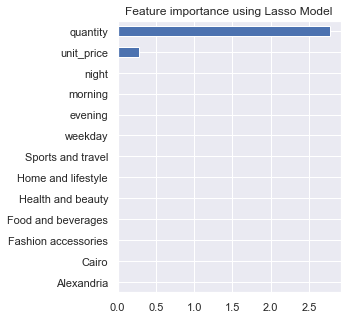

In [67]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (4.0, 5.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

The result shows that there are very strong relashionships between gross income (dependent variable/target) and quantity and unit price (independent variables).

#### 6.2. Seaborn Correlation Heatmap Model

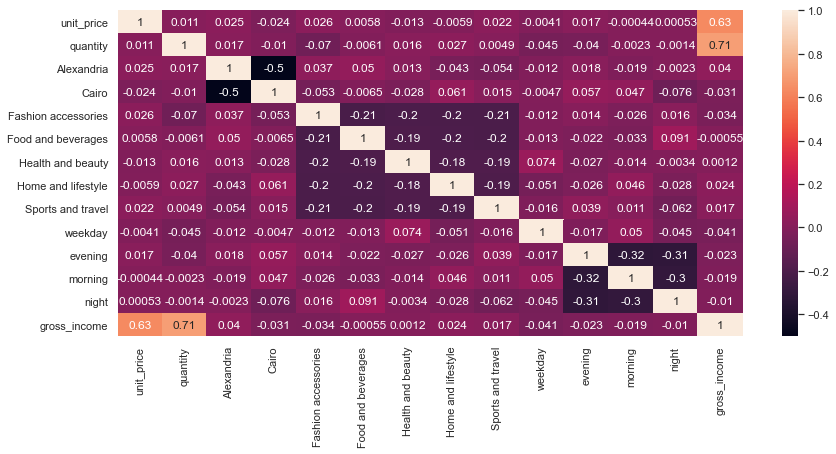

In [68]:
#Getting Correlations of Each Features in Dataset
corrmat = df_Final1.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (14,6))
sns.heatmap(df_Final1[top_corr_features].corr(), annot=True )

The result shows that there are very strong relationships between gross income and unit price and quantity. With r=0.63 and r=0.71 the relationship between gross income and unit price and quantity are the strongest one among the other feature's relationships.

#### 6.3. Features Correlation using corr() Function:
 
Features correlation shows the relationship (positive or negative) between the variables. Generally the strength of correlation is measured by:
* Very strong relationship(|r| > 0.8)
* Strong relationship (0.6 <= |r|)
* Moderate relationship (0.4 <= |r|)
* Weak relationship (0.2 <= |r|)
* Very weak relationship (|r| < 0.2)

In [69]:
myData = pd.read_csv("supermarket_sales.csv" )
myData.head()

,invoiceID,branch,city,cust_type,gender,type,unit_price,quantity,date,time,payment,cost,rating,gross_income
0,101-17-6199,A,Cairo,Normal,Male,Food and beverages,45.79,7,3/13/2019,19:44,Credit card,320.53,7.0,16.0265
1,101-81-4070,C,Alexandria,Member,Female,Health and beauty,62.82,2,1/17/2019,12:36,eWallet,125.64,4.9,6.2820
2,102-06-2002,C,Alexandria,Member,Male,Sports and travel,25.25,5,3/20/2019,17:52,Cash,126.25,6.1,6.3125
3,102-77-2261,C,Alexandria,Member,Male,Health and beauty,65.31,7,3/5/2019,18:02,Credit card,457.17,4.2,22.8585
4,105-10-6182,A,Cairo,Member,Male,Fashion accessories,21.48,2,2/27/2019,12:22,eWallet,42.96,6.6,2.1480


In [70]:
myData_Features = myData[['unit_price', 'quantity', 'cost', 'gross_income']]

In [71]:
print(myData_Features.corr())

              unit_price  quantity      cost  gross_income
unit_price      1.000000  0.010778  0.633962      0.633962
quantity        0.010778  1.000000  0.705510      0.705510
cost            0.633962  0.705510  1.000000      1.000000
gross_income    0.633962  0.705510  1.000000      1.000000


In [72]:
print(df_Final1.corr())

                     unit_price  quantity  Alexandria     Cairo  \
unit_price             1.000000  0.010778    0.024717 -0.024157   
quantity               0.010778  1.000000    0.017291 -0.010403   
Alexandria             0.024717  0.017291    1.000000 -0.501441   
Cairo                 -0.024157 -0.010403   -0.501441  1.000000   
Fashion accessories    0.026034 -0.070485    0.036841 -0.052539   
Food and beverages     0.005836 -0.006084    0.050161 -0.006459   
Health and beauty     -0.013072  0.015709    0.012720 -0.027518   
Home and lifestyle    -0.005854  0.027446   -0.043459  0.061037   
Sports and travel      0.022257  0.004912   -0.054086  0.014524   
weekday               -0.004133 -0.045336   -0.012045 -0.004712   
evening                0.016586 -0.040263    0.018039  0.056769   
morning               -0.000436 -0.002282   -0.019042  0.047382   
night                  0.000528 -0.001446   -0.002319 -0.076499   
gross_income           0.633962  0.705510    0.040176 -0.03099

We will use te describe() method to output a dataframe information.

In [73]:
df_Final1.describe()

,unit_price,quantity,Alexandria,Cairo,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel,weekday,evening,morning,night,gross_income
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,55.672130,5.510000,0.32800,0.340000,0.178000,0.174000,0.152000,0.160000,0.166000,0.703000,0.251000,0.231000,0.227000,15.379369
std,26.494628,2.923431,0.46972,0.473946,0.382704,0.379299,0.359201,0.366789,0.372267,0.457165,0.433805,0.421683,0.419102,11.708825
min,10.080000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.508500
25%,32.875000,3.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.924875
50%,55.230000,5.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,12.088000
75%,77.935000,8.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,22.445250
max,99.960000,10.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,49.650000


In [74]:
df_Final1

,unit_price,quantity,Alexandria,Cairo,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel,weekday,evening,morning,night,gross_income
branch,,,,,,,,,,,,,,
A,45.79,7,0,1,0,1,0,0,0,1,0,0,1,16.0265
C,62.82,2,1,0,0,0,1,0,0,1,0,0,0,6.2820
C,25.25,5,1,0,0,0,0,0,1,1,1,0,0,6.3125
C,65.31,7,1,0,0,0,1,0,0,1,1,0,0,22.8585
A,21.48,2,0,1,1,0,0,0,0,1,0,1,0,2.1480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C,43.18,8,1,0,0,1,0,0,0,0,0,0,1,17.2720
B,36.51,9,0,0,1,0,0,0,0,0,0,1,0,16.4295
B,18.08,3,0,0,0,1,0,0,0,1,0,0,1,2.7120


### Step 7:   Building the Model
#### * Multiple Linear Regression
Multiple linear regression uses a linear function to predict the value of a target variable y, containing the function n independent variable x= [x₁, x₂, x₃, …, xₙ].
y =b ₀ + b ₁x ₁ + b₂x₂ + b₃x₃ + … + bₙxₙ
We obtain the values of the parameters bᵢ, using the same technique as in simple linear regression (least square error). After fitting the model, we can use the equation to predict the value of the target variable y.


In [75]:
#column_names = ['unit_price','quantity','Alexandria','Cairo','Fashion accessories','Food and beverages','Health and beauty','Sports and travel','weekday','evening','morning','night','gross_income' ]
#column_names = ['unit_price','quantity','weekday','evening','morning','night','gross_income']
#column_names = ['unit_price','quantity','Alexandria','gross_income']
#column_names = ['unit_price','quantity','gross_income']
#column_names = ['unit_price','quantity','morning','gross_income']
#column_names = ['unit_price','quantity','evening','gross_income']
#column_names = ['unit_price','quantity','night','gross_income']
column_names = ['unit_price','quantity','gross_income']
#column_names = ['unit_price','quantity','weekday','gross_income']

df_Final1 = df_Final1.reindex(columns=column_names)
df_Final1.head()

,unit_price,quantity,gross_income
branch,,,
A,45.79,7,16.0265
C,62.82,2,6.2820
C,25.25,5,6.3125
C,65.31,7,22.8585
A,21.48,2,2.1480


In [76]:
df_Final1.dtypes

unit_price      float64
quantity          int64
gross_income    float64
dtype: object

#### * checking the average value of the “gross income” column.

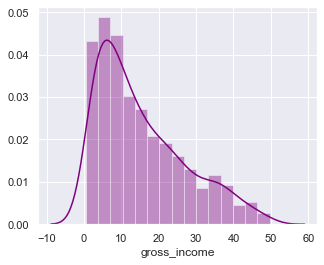

In [77]:
plt.figure(figsize=(5,4))
plt.tight_layout()
seabornInstance.distplot(df_Final1['gross_income'],color='purple')

Seaborn module along with Matplotlib module helps in the data visualization and depicts the distribution of data.The gross income  distribution depicted above are positively-skewed (or right-skewed) to an increasing degree.By the above Skewness we can judge that the likelihood of the amount of gross income falling in the tail of a distribution is more. 

Seaborn Distplot represents the overall distribution of continuous data variables.

In [78]:
X = df_Final1.iloc[:, 0:2]  # independent columns
y = df_Final1.iloc[:,-1]    # target column(grosss_income)

print("x=", X)
print("y=", y)

x=         unit_price  quantity
branch                      
A            45.79         7
C            62.82         2
C            25.25         5
C            65.31         7
A            21.48         2
...            ...       ...
C            43.18         8
B            36.51         9
B            18.08         3
A            21.32         1
A            76.40         9

[1000 rows x 2 columns]
y= branch
A    16.0265
C     6.2820
C     6.3125
C    22.8585
A     2.1480
      ...   
C    17.2720
B    16.4295
B     2.7120
A     1.0660
A    34.3800
Name: gross_income, Length: 1000, dtype: float64


#### * Splitting  Data 

To start analyzing the dataset using ML Regression, the data had to pass a certain required assumption: The variables are measured at a continuous level, There exists a linear relationship between the variables, The observations are independent of each other (there was no dependency), Data had no significant outliers, and The independent variables are not too highly correlated with each other. Our data set passed all these assumptions and now to start modeling the first thing we need to do is split the data into a training set and test set. The training set is what we will train the model on and the test set is what we will test it on. We dedicate 20% of data to the testing set and 80% to the training, but there is not hard limits.

In [79]:
# split X and y to the traing and testing sets 
from sklearn.model_selection import train_test_split

y1 = np.ravel(y)
X_train, X_test, y_train, y_test=train_test_split(X, y1, test_size=0.2, random_state= 1)

#### * Create and fit the model:
Create an instance of the Linear Regression model from SkLearn and then call the fit() method to train the model on our training data.

In [80]:
# create a Linear Regression model object
from sklearn.linear_model import LinearRegression

regression=LinearRegression() # linear Regression Class Object
regression.fit(X_train, y_train) # Using fit method to train the model using traing set

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### * Explore the output:

In [81]:
print("The intercept for our model is: ", regression.intercept_)
print("The coefficent for our model is: ", regression.coef_)

The intercept for our model is:  -15.779767284902022
The coefficent for our model is:  [0.27477519 2.86385902]


This means that for every one unit of change in each value of the features(unit_price, quantity,...),the change in the gross income is about one of the amount of above in %.

In [82]:
# The y_pred is a numpy array that contains all the predicted values for the input values in the X_test series.
y_predict = regression.predict(X_test)
type(y_predict)

# show the first 5 predictions
y_predict[:5]

array([ 8.71240678, 21.87483981, 20.17941838, 29.28143423,  3.6530355 ])

### Fitting the Model:
Scikit-learn is a free machine learning library for python. We can easily implement linear regression with Scikit-learn using the LinearRegression class. After creating a linear regression object, we can obtain the line that best fits our data by calling the fit method.

We can examine how well our data fit the model. So, we will take y_predicts and compare them to our y_actuals. These will be our residuals. From here we can calculate a few metrics to help quantify how well our model fit the data. Here are a few popular metrics:
* Mean Absolute Error (MAE): We know that an error basically is the absolute difference between the actual or true values and the values that are predicted. Absolute difference means that if the result has a negative sign, it is ignored.
Hence, MAE = True values – Predicted values
MAE takes the average of this error from every sample in a dataset and gives the output. 

* Mean Square Error (MSE): MSE is calculated by taking the average of the square of the difference between the original and predicted values of the data ( the average of the square of the errors). The larger the number the larger the error.

* Root Mean Square Error (RMSE): RMSE is the standard deviation of the errors which occur when a prediction is made on a dataset. This is the same as MSE (Mean Squared Error) but the root of the value is considered while determining the accuracy of the model.

In [83]:
import math

# calculate the mean squared error
model_mse = mean_squared_error(y_test, y_predict)

# calculate the mean absolute error
model_mae = mean_absolute_error(y_test, y_predict)

# calculate the root mean squared errorculate
model_rmse = math.sqrt(model_mse)

# Display the output
print("MSE: {:,.3}".format(model_mse))
print("MAE: {:,.3}".format(model_mae))
print("RMSE: {:,.3}".format(model_rmse))

MSE: 15.5
MAE: 2.95
RMSE: 3.94


The smaller the means squared error, the closer we are to finding the line of best fit. Depending on the data, it may be impossible to get a very small value for the mean squared error. 

* R Squared (R2): It is also known as the coefficient of determination. This metric gives an indication of how good a model fits a given dataset. It indicates how close the regression line (i.e. the predicted values plotted) is to the actual data values. The R squared value lies between 0 and 1 where 0 indicates that this model doesn't fit the given data and 1 indicates that the model fits perfectly to the dataset provided.

In [84]:
model_r2 = r2_score(y_test, y_predict)
print("R2: {:,.3}".format(model_r2))

R2: 0.889


### Step 8: Plotting the Regression Line:

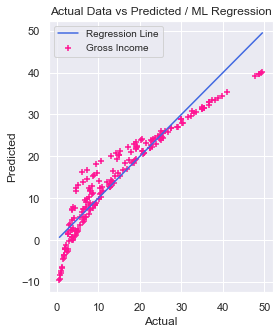

In [85]:
# So let's run the model against the test data
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(y_test, y_predict,  color = 'deeppink', label = 'Gross Income', marker='+')
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],lw=1.5, color = 'royalblue', label = "Regression Line")
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual Data vs Predicted / ML Regression")

leg = ax.legend(prop={"size":10})
plt.show()

Through using python libraries, it was found that customers shopped most during the weekends rather than weekdays, and the most shopped time during the day was in the morning by selecting different combinations of features 
and creating new data frames (df_Final1) associated with those selected features to use them as X values in the prediction model.

The results showed that the predictions had a high accuracy, and the best way to increase the gross income is to have promotions on weekend mornings because it is the most shopped time of the week.


#### >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>